In [1]:
# python
from tqdm.notebook import tqdm
import sys
import os
import importlib
# columnar analysis
import awkward as ak
import mplhep as hep
import numpy as np
from coffea.nanoevents import NanoEventsFactory, NanoAODSchema
# local
sys.path.insert(1, os.path.join(sys.path[0], '../..')) # fixme: there must be a better way to handle this...
from sidm.tools import sidm_processor, utilities
# always reload local modules to pick up changes during development
importlib.reload(sidm_processor)
importlib.reload(utilities)
# plotting
import matplotlib.pyplot as plt
utilities.set_plot_style()
%matplotlib inline

In [2]:
def structure(vari, cha1, cha2):
    print("4mu {0} structure: {1}".format(vari, cha1))
    print("2mu2e {0} structure: {1}".format(vari, cha2))
    
    return vari

In [3]:
samples_2mu2e = [
    '2mu2e_500GeV_5GeV_0p08mm',
    '2mu2e_500GeV_5GeV_0p8mm',
    '2mu2e_500GeV_5GeV_8p0mm',
    '2mu2e_500GeV_5GeV_40p0mm',
    '2mu2e_500GeV_5GeV_80p0mm',
]

samples_4mu = [
    '4mu_500GeV_5GeV_0p08mm',
    '4mu_500GeV_5GeV_0p8mm',
    '4mu_500GeV_5GeV_8p0mm',
    '4mu_500GeV_5GeV_40p0mm',
    '4mu_500GeV_5GeV_80p0mm',
]

In [4]:
fileset_4mu = utilities.make_fileset(samples_4mu, "llpNanoAOD_v1")
fileset_2mu2e = utilities.make_fileset(samples_2mu2e, "llpNanoAOD_v1")

events_2mu2e, events_4mu = {}, {}

for i in tqdm(samples_2mu2e):
    fname = fileset_2mu2e[i][0]
    print(fname)
    events_2mu2e[i] = NanoEventsFactory.from_root(
        fname,
        schemaclass=NanoAODSchema,
    ).events().Electron
    
for i in tqdm(samples_4mu):
    fname = fileset_4mu[i][0]
    print(fname)
    events_4mu[i] = NanoEventsFactory.from_root(
        fname,
        schemaclass=NanoAODSchema,
    ).events().Electron

  0%|          | 0/5 [00:00<?, ?it/s]

root://xcache//store/group/lpcmetx/SIDM/ULSignalSamples/2018_v6/LLPNanoAOD/SIDM_BsTo2DpTo2Mu2e_MBs-500_MDp-5p0_ctau-0p08/LLPnanoAOD/SIDM_BsTo2DpTo2Mu2e_MBs-500_MDp-5p0_ctau-0p08_part-0.root
root://xcache//store/group/lpcmetx/SIDM/ULSignalSamples/2018_v6/LLPNanoAOD/SIDM_BsTo2DpTo2Mu2e_MBs-500_MDp-5p0_ctau-0p8/LLPnanoAOD/SIDM_BsTo2DpTo2Mu2e_MBs-500_MDp-5p0_ctau-0p8_part-0.root
root://xcache//store/group/lpcmetx/SIDM/ULSignalSamples/2018_v6/LLPNanoAOD/SIDM_BsTo2DpTo2Mu2e_MBs-500_MDp-5p0_ctau-8p0/LLPnanoAOD/SIDM_BsTo2DpTo2Mu2e_MBs-500_MDp-5p0_ctau-8p0_part-0.root
root://xcache//store/group/lpcmetx/SIDM/ULSignalSamples/2018_v6/LLPNanoAOD/SIDM_BsTo2DpTo2Mu2e_MBs-500_MDp-5p0_ctau-40p0/LLPnanoAOD/SIDM_BsTo2DpTo2Mu2e_MBs-500_MDp-5p0_ctau-40p0_part-0.root
root://xcache//store/group/lpcmetx/SIDM/ULSignalSamples/2018_v6/LLPNanoAOD/SIDM_BsTo2DpTo2Mu2e_MBs-500_MDp-5p0_ctau-80p0/LLPnanoAOD/SIDM_BsTo2DpTo2Mu2e_MBs-500_MDp-5p0_ctau-80p0_part-0.root


  0%|          | 0/5 [00:00<?, ?it/s]

root://xcache//store/group/lpcmetx/SIDM/ULSignalSamples/2018_v6/LLPNanoAOD/SIDM_BsTo2DpTo4Mu_MBs-500_MDp-5p0_ctau-0p08/LLPnanoAOD/SIDM_BsTo2DpTo4Mu_MBs-500_MDp-5p0_ctau-0p08_part-0.root
root://xcache//store/group/lpcmetx/SIDM/ULSignalSamples/2018_v6/LLPNanoAOD/SIDM_BsTo2DpTo4Mu_MBs-500_MDp-5p0_ctau-0p8/LLPnanoAOD/SIDM_BsTo2DpTo4Mu_MBs-500_MDp-5p0_ctau-0p8_part-0.root
root://xcache//store/group/lpcmetx/SIDM/ULSignalSamples/2018_v6/LLPNanoAOD/SIDM_BsTo2DpTo4Mu_MBs-500_MDp-5p0_ctau-8p0/LLPnanoAOD/SIDM_BsTo2DpTo4Mu_MBs-500_MDp-5p0_ctau-8p0_part-0.root
root://xcache//store/group/lpcmetx/SIDM/ULSignalSamples/2018_v6/LLPNanoAOD/SIDM_BsTo2DpTo4Mu_MBs-500_MDp-5p0_ctau-40p0/LLPnanoAOD/SIDM_BsTo2DpTo4Mu_MBs-500_MDp-5p0_ctau-40p0_part-0.root
root://xcache//store/group/lpcmetx/SIDM/ULSignalSamples/2018_v6/LLPNanoAOD/SIDM_BsTo2DpTo4Mu_MBs-500_MDp-5p0_ctau-80p0/LLPnanoAOD/SIDM_BsTo2DpTo4Mu_MBs-500_MDp-5p0_ctau-80p0_part-0.root


In [5]:
print(events_2mu2e["2mu2e_500GeV_5GeV_0p08mm"].fields)

['dEscaleDown', 'dEscaleUp', 'dEsigmaDown', 'dEsigmaUp', 'deltaEtaSC', 'dr03EcalRecHitSumEt', 'dr03HcalDepth1TowerSumEt', 'dr03TkSumPt', 'dr03TkSumPtHEEP', 'dxy', 'dxyErr', 'dz', 'dzErr', 'eCorr', 'eInvMinusPInv', 'energyErr', 'eta', 'hoe', 'ip3d', 'jetPtRelv2', 'jetRelIso', 'mass', 'miniPFRelIso_all', 'miniPFRelIso_chg', 'mvaFall17V2Iso', 'mvaFall17V2noIso', 'pfRelIso03_all', 'pfRelIso03_chg', 'phi', 'pt', 'r9', 'scEtOverPt', 'sieie', 'sip3d', 'mvaTTH', 'charge', 'cutBased', 'jetIdx', 'pdgId', 'photonIdx', 'tightCharge', 'vidNestedWPBitmap', 'vidNestedWPBitmapHEEP', 'convVeto', 'cutBased_HEEP', 'isPFcand', 'jetNDauCharged', 'lostHits', 'mvaFall17V2Iso_WP80', 'mvaFall17V2Iso_WP90', 'mvaFall17V2Iso_WPL', 'mvaFall17V2noIso_WP80', 'mvaFall17V2noIso_WP90', 'mvaFall17V2noIso_WPL', 'seedGain', 'genPartIdx', 'genPartFlav', 'cleanmask', 'genPartIdxG', 'jetIdxG', 'photonIdxG']


# missing inner hits 
## (or ideally which layers have hits)

## lostHits

4mu lostHits structure: [[], [], [], [], [], [], [], [], [], [], ... [1], [], [], [], [], [], [], [], []]
2mu2e lostHits structure: [[0, 0], [0, 0], [0], [0], [0, 0], [0], ... 0, 0], [0, 0], [0, 1], [0, 0], [0], [0]]
4mu lostHits structure: [[0], [], [], [], [], [], [], [], [], [], ... [0], [], [], [0], [], [], [], [], []]
2mu2e lostHits structure: [[0, 0], [0, 0], [0, 0], [0, 0, 0], [0, 0, ... [0, 0], [0, 0], [1], [0], [0, 0, 3]]
4mu lostHits structure: [[], [], [], [], [], [], [], [0], [], [], ... [], [], [], [0, 0], [], [], [3], []]
2mu2e lostHits structure: [[], [2], [0], [], [0, 3], [], [2, 0, 2], ... 0], [], [], [], [4], [], [0], [], [4]]
4mu lostHits structure: [[], [], [], [], [], [], [], [], [], [], ... [0], [], [], [], [], [0], [], [], []]
2mu2e lostHits structure: [[0], [], [0], [], [], [], [], [], [], ... [], [], [3], [4, 3], [0, 0], [], []]
4mu lostHits structure: [[], [], [], [0], [], [], [], [], [], [], ... [0], [0, 0], [], [], [], [], [0], []]
2mu2e lostHits structure: 

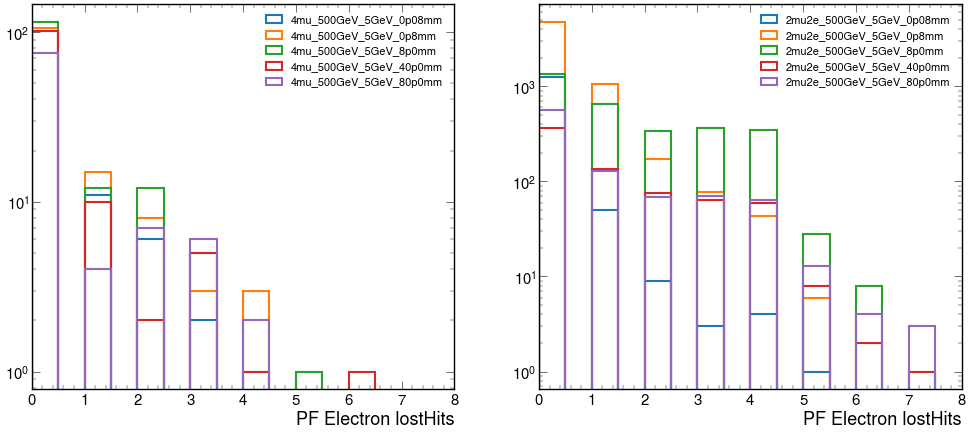

In [9]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(1, 2, figsize=(24,10))
for i_2mu, i_4mu in zip(samples_2mu2e,samples_4mu):
    structure("lostHits", events_4mu[i_4mu].lostHits, events_2mu2e[i_2mu].lostHits)
    ax[0].hist(ak.flatten(events_4mu[i_4mu].lostHits), range=(0,8), alpha=1, bins=16, histtype='step', linewidth=3, label=i_4mu)
    ax[1].hist(ak.flatten(events_2mu2e[i_2mu].lostHits), range=(0,8), alpha=1, bins=16, histtype='step', linewidth=3, label=i_2mu)
    
ax[0].set_xlim(0,8)
ax[1].set_xlim(0,8)
ax[0].set_xlabel('PF Electron lostHits')
ax[1].set_xlabel('PF Electron lostHits')
ax[0].legend(fontsize=16)
ax[1].legend(fontsize=16)
ax[0].set_yscale("log")
ax[1].set_yscale("log")
plt.savefig("../Plots/PF_ELECTRON/Missing_Hits/lostHits.png", bbox_inches="tight")

## seedGain

4mu seedGain structure: [[], [], [], [], [], [], [], [], [], [], ... [12], [], [], [], [], [], [], [], []]
2mu2e seedGain structure: [[12, 12], [12, 12], [12], [12], [12, 12], ... [6, 12], [6, 12], [6, 12], [12], [6]]
4mu seedGain structure: [[12], [], [], [], [], [], [], [], [], ... [12], [], [], [12], [], [], [], [], []]
2mu2e seedGain structure: [[12, 12], [12, 12], [12, 12], [12, 12, 12, ... [12, 12], [12], [12], [12, 12, 12]]
4mu seedGain structure: [[], [], [], [], [], [], [], [12], [], ... [], [], [], [12, 12], [], [], [12], []]
2mu2e seedGain structure: [[], [12], [12], [], [6, 12], [], [6, 12, ... [], [], [], [12], [], [12], [], [12]]
4mu seedGain structure: [[], [], [], [], [], [], [], [], [], [], ... [12], [], [], [], [], [12], [], [], []]
2mu2e seedGain structure: [[12], [], [12], [], [], [], [], [], ... [], [], [12], [12, 12], [12, 12], [], []]
4mu seedGain structure: [[], [], [], [12], [], [], [], [], [], ... 12], [12, 12], [], [], [], [], [12], []]
2mu2e seedGain structu

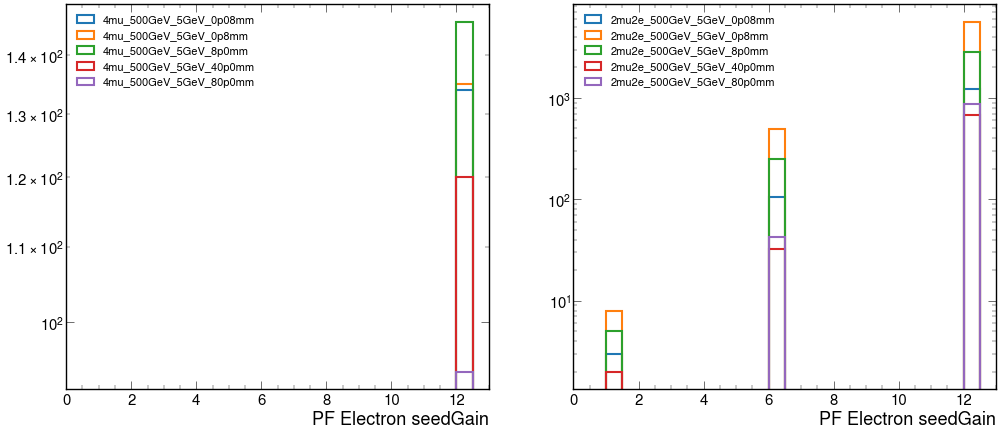

In [13]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(1, 2, figsize=(24,10))
for i_2mu, i_4mu in zip(samples_2mu2e,samples_4mu):
    structure("seedGain", events_4mu[i_4mu].seedGain, events_2mu2e[i_2mu].seedGain)
    ax[0].hist(ak.flatten(events_4mu[i_4mu].seedGain), range=(0,13), alpha=1, bins=26, histtype='step', linewidth=3, label=i_4mu)
    ax[1].hist(ak.flatten(events_2mu2e[i_2mu].seedGain), range=(0,13), alpha=1, bins=26, histtype='step', linewidth=3, label=i_2mu)
    
ax[0].set_xlim(0,13)
ax[1].set_xlim(0,13)
ax[0].set_xlabel('PF Electron seedGain')
ax[1].set_xlabel('PF Electron seedGain')
ax[0].legend(fontsize=16)
ax[1].legend(fontsize=16)
ax[0].set_yscale("log")
ax[1].set_yscale("log")
plt.savefig("../Plots/PF_ELECTRON/Missing_Hits/seedGain.png", bbox_inches="tight")